# PART 1
## DATA CLEANSING AND PRE-PROCESSING

In [1]:
# Import Libraries required for analysis
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load data
data = pd.read_csv("Garmin_run_data.csv")

In [3]:
# Check the first few rows
data.head()

,Activity Type,Date,Title,Distance,Calories,Time,Avg HR,Max HR,Avg Run Cadence,Max Run Cadence,Avg Pace,Best Pace,Elev Gain,Elev Loss,Avg Stride Length,Best Lap Time,Number of Laps
0,Running,7/15/20 9:41,Cherry Hill Running,6.00,530,0:43:55,141,160,176,182,7:19,6:20,169,173,1.26,00:02.3,7
1,Running,7/14/20 17:45,Cherry Hill Running,6.50,587,0:47:04,144,160,172,182,7:14,6:35,183,187,1.29,03:32.7,7
2,Running,7/13/20 18:57,Cherry Hill Running,5.01,392,0:40:29,128,151,170,180,8:05,5:49,124,124,1.17,00:04.1,6
3,Running,7/12/20 18:44,Cherry Hill Running,7.01,633,0:52:55,142,157,172,180,7:33,5:00,215,219,1.24,00:05.1,8
4,Running,7/11/20 19:35,Cherry Hill Running,5.19,419,0:41:35,129,143,170,178,8:01,6:48,76,80,1.18,01:27.1,6


In [4]:
print(data['Calories'][218])

--


In [5]:
# Check the data structure
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 689 entries, 0 to 688
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Activity Type      689 non-null    object 
 1   Date               689 non-null    object 
 2   Title              689 non-null    object 
 3   Distance           689 non-null    float64
 4   Calories           689 non-null    object 
 5   Time               689 non-null    object 
 6   Avg HR             689 non-null    object 
 7   Max HR             689 non-null    object 
 8   Avg Run Cadence    689 non-null    object 
 9   Max Run Cadence    689 non-null    object 
 10  Avg Pace           689 non-null    object 
 11  Best Pace          689 non-null    object 
 12  Elev Gain          689 non-null    object 
 13  Elev Loss          689 non-null    object 
 14  Avg Stride Length  689 non-null    float64
 15  Best Lap Time      689 non-null    object 
 16  Number of Laps     689 non

In [6]:
# Drop columns that won't be used
irrelevant_columns = ['Activity Type', 'Title', 'Number of Laps', 'Best Lap Time']
data = data.drop(columns=irrelevant_columns)

In [7]:
# Function to convert time to seconds based on format
def time_to_seconds(time_str):
    try:
        # Split the time string into parts
        parts = time_str.split(':')
        
        if len(parts) == 3:  # Format hh:mm:ss
            return float(parts[0]) * 3600 + float(parts[1]) * 60 + float(parts[2])
        elif len(parts) == 2:  # Format mm:ss.ms
            return float(parts[0]) * 60 + float(parts[1])
        else:
            return None  # Invalid format
    except (AttributeError, ValueError):
        return None  # Handle invalid or missing values

# Apply the function to convert time to seconds
data['Duration'] = data['Time'].apply(time_to_seconds)
data['Avg_Pace_seconds'] = data['Avg Pace'].apply(time_to_seconds)
data['Best_Pace_seconds'] = data['Best Pace'].apply(time_to_seconds)

In [8]:
# Convert numeric columns to float
numeric_columns = ['Avg HR', 'Max HR', 'Calories', 'Avg Run Cadence', 'Max Run Cadence', 
                   'Elev Gain', 'Elev Loss']

for col in numeric_columns:
    data[col] = pd.to_numeric(data[col], errors='coerce') 
    
    
# Convert date column to datetime 
data['Date'] = pd.to_datetime(data['Date'], format='%m/%d/%y %H:%M')

# Verify updated data types
print(data.dtypes)
print(data)

Date                 datetime64[ns]
Distance                    float64
Calories                    float64
Time                         object
Avg HR                      float64
Max HR                      float64
Avg Run Cadence             float64
Max Run Cadence             float64
Avg Pace                     object
Best Pace                    object
Elev Gain                   float64
Elev Loss                   float64
Avg Stride Length           float64
Duration                    float64
Avg_Pace_seconds            float64
Best_Pace_seconds           float64
dtype: object
                   Date  Distance  Calories     Time  Avg HR  Max HR  \
0   2020-07-15 09:41:00      6.00     530.0  0:43:55   141.0   160.0   
1   2020-07-14 17:45:00      6.50     587.0  0:47:04   144.0   160.0   
2   2020-07-13 18:57:00      5.01     392.0  0:40:29   128.0   151.0   
3   2020-07-12 18:44:00      7.01     633.0  0:52:55   142.0   157.0   
4   2020-07-11 19:35:00      5.19     419.0  0:41:

In [9]:
print('SUM OF DUPLICATE VALUES:')
# Check for duplicates
print(data.duplicated().sum())

SUM OF DUPLICATE VALUES:
0


In [10]:
# Identify missing values
print('SUM OF MISSING VALUES:')
print(data.isnull().sum())

SUM OF MISSING VALUES:
Date                  0
Distance              0
Calories             55
Time                  0
Avg HR               26
Max HR               26
Avg Run Cadence      29
Max Run Cadence      29
Avg Pace              0
Best Pace             0
Elev Gain            68
Elev Loss            65
Avg Stride Length     0
Duration              0
Avg_Pace_seconds      7
Best_Pace_seconds    33
dtype: int64


In [11]:
# Drop rows with missing values in features or target
data_cleaned = data.dropna(subset=['Elev Gain', 'Calories', 'Avg Run Cadence', 'Elev Loss'])


In [12]:
# Identify missing values
print('SUM OF MISSING VALUES:')
print(data_cleaned.isnull().sum())

SUM OF MISSING VALUES:
Date                 0
Distance             0
Calories             0
Time                 0
Avg HR               0
Max HR               0
Avg Run Cadence      0
Max Run Cadence      0
Avg Pace             0
Best Pace            0
Elev Gain            0
Elev Loss            0
Avg Stride Length    0
Duration             0
Avg_Pace_seconds     0
Best_Pace_seconds    0
dtype: int64


# PART 2
## Data Analysis

The following analysis focuses on Jeffrey Braun, a running and data enthusiast who tracked his training over a two-year period (2019–2020). During this time, Jeffrey mentioned graduating from college in 2019. Assuming he began his degree at age 18 and completed a three-year program, we estimate that Jeffrey was 21 years old upon graduation. For the purpose of this heart rate zone analysis, we will use 21 as his age. While this assumption may not be perfectly accurate, it provides a reasonable basis for exploring the impact of heart rate zone training on various aspects of athletic performance.

The maximum heart rate (maxHR) is calculated using the widely accepted formula: 220 - age. Given that Jeffrey is assumed to be 21 years old, his maximum heart rate is estimated to be 199 bpm for this analysis.

In [13]:
# Add Average heart rate zone calculation
# Define a function to calculate the heart rate zone

max_hr = 199

def calculate_hr_zone(avg_hr, max_hr):
    percentage = (avg_hr / max_hr) * 100
    if percentage < 50:
        return 0 #Below zone 1
    elif 50 <= percentage < 60:
        return 1
    elif 60 <= percentage < 70:
        return 2
    elif 70 <= percentage < 80:
        return 3
    elif 80 <= percentage < 90:
        return 4
    elif 90 <= percentage <= 100:
        return 5
    else:
        return 6 #Above zone 5

# Apply the function to the dataset
data_cleaned['Heart Rate Zone'] = data.apply(lambda row: calculate_hr_zone(row['Avg HR'], max_hr), axis=1)

# Check the result
print(data_cleaned[['Avg HR', 'Heart Rate Zone']].head())


   Avg HR  Heart Rate Zone
0   141.0                3
1   144.0                3
2   128.0                2
3   142.0                3
4   129.0                2


/var/folders/0t/wyhprnnd3zv1k7khwt5cvrym0000gn/T/ipykernel_55845/2050140481.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['Heart Rate Zone'] = data.apply(lambda row: calculate_hr_zone(row['Avg HR'], max_hr), axis=1)


/var/folders/0t/wyhprnnd3zv1k7khwt5cvrym0000gn/T/ipykernel_55845/2564541199.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data_cleaned.corr()


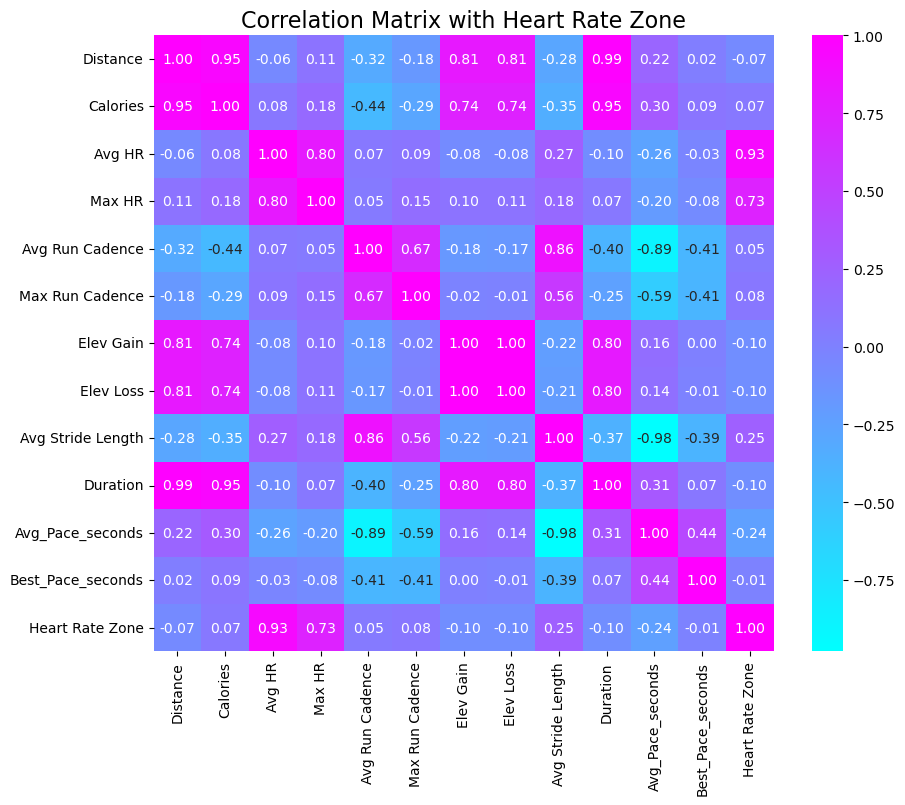

In [14]:
# Create correlation matrix to analyse the key performance indicators against heart rate metrics 
correlation_matrix = data_cleaned.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="cool", cbar=True)
plt.title("Correlation Matrix with Heart Rate Zone", fontsize=16)
plt.show()

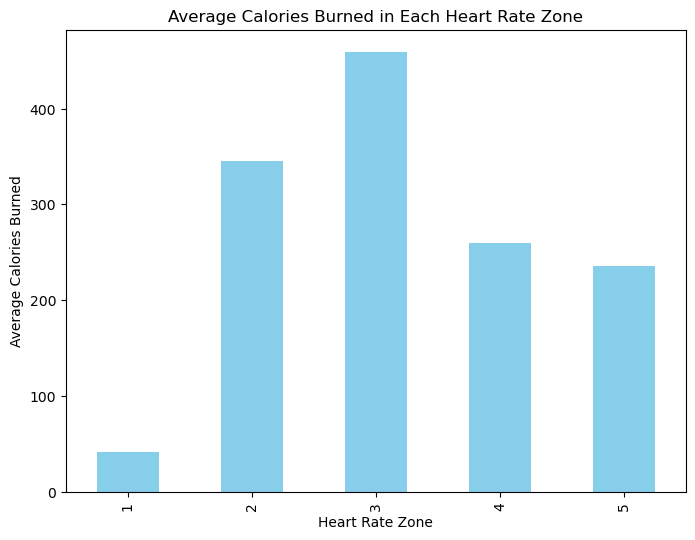

In [15]:
# Calculate average calories burned per heart rate zone
avg_calories_per_zone = data_cleaned.groupby('Heart Rate Zone')['Calories'].mean()

# Plot the results
avg_calories_per_zone.plot(kind='bar', figsize=(8, 6), color='skyblue')
plt.xlabel('Heart Rate Zone')
plt.ylabel('Average Calories Burned')
plt.title('Average Calories Burned in Each Heart Rate Zone')
plt.show()


# PART 3

## Predictive Modelling

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# Define features and target
X = data_cleaned[['Distance', 'Avg HR', 'Heart Rate Zone', 'Max HR']]
y = data_cleaned['Calories']


# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))



Mean Absolute Error: 56.56149504062831


Text(0.5, 1.0, 'Residual Plot')

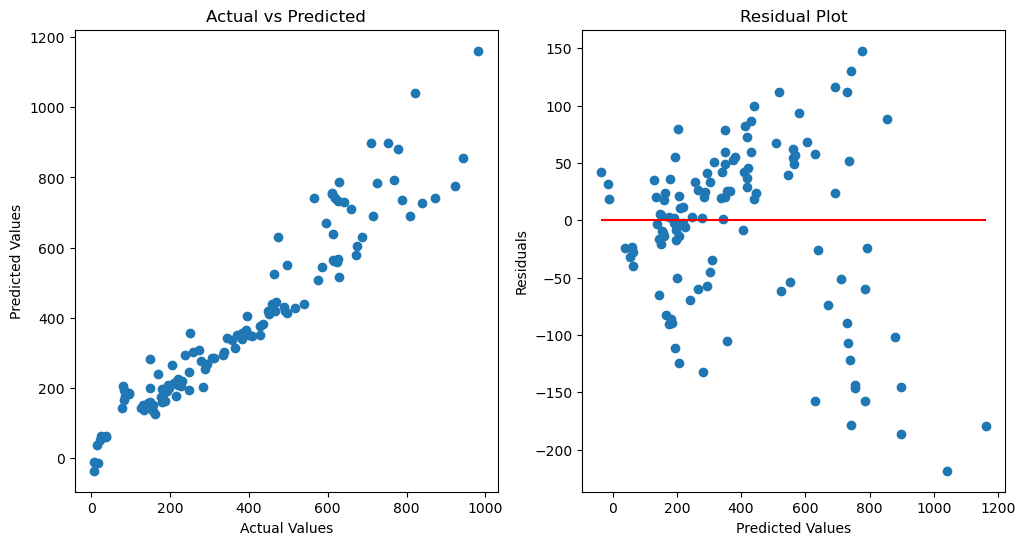

In [17]:
# Residual plot
residuals = y_test - y_pred
plt.figure(figsize=(12, 6))

# Predicted vs Actual plot (on the left)
plt.subplot(1, 2, 1)  # First plot
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted")

# Residual plot (on the right) #difference between observed value and predicted values
plt.subplot(1, 2, 2)  # Second plot
plt.scatter(y_pred, residuals)
plt.hlines(y=0, xmin=min(y_pred), xmax=max(y_pred), colors='red')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")

In [18]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Define features and target
X = data_cleaned[['Distance', 'Avg HR', 'Heart Rate Zone', 'Max HR']]  # Features
y = data_cleaned['Calories']  # Target


# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on test data
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
mae_rf = mean_absolute_error(y_test, y_pred_rf)


print(f"Random Forest MAE: ", mae_rf )

Random Forest MAE:  37.90533333333334


Text(0.5, 1.0, 'Residual Plot')

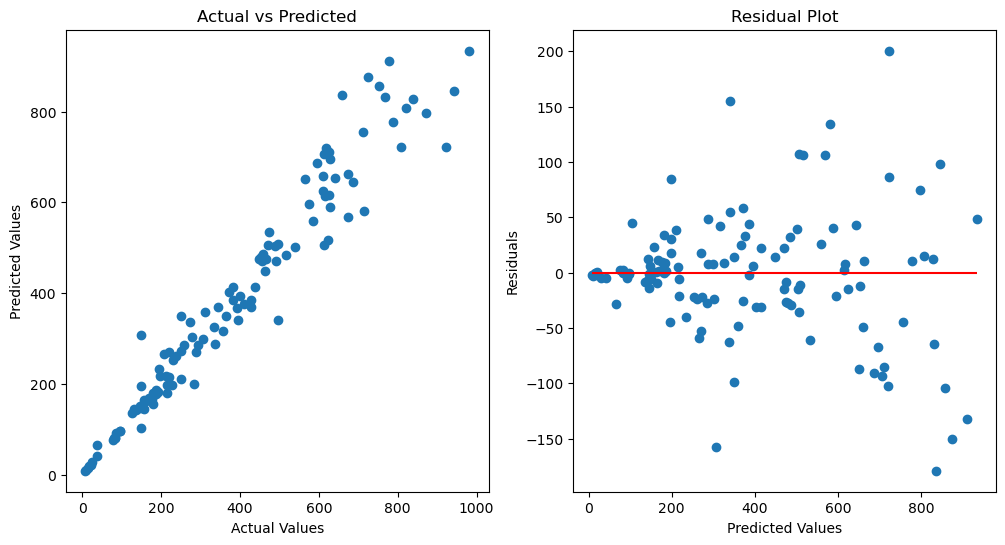

In [19]:
# Residual plot
residuals = y_test - y_pred_rf
plt.figure(figsize=(12, 6))

# Predicted vs Actual plot (on the left)
plt.subplot(1, 2, 1)  # First plot
plt.scatter(y_test, y_pred_rf)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted")

# Residual plot (on the right)
plt.subplot(1, 2, 2)  # Second plot #difference between observed value and predicted values
plt.scatter(y_pred_rf, residuals)
plt.hlines(y=0, xmin=min(y_pred_rf), xmax=max(y_pred_rf), colors='red')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")